# Dataset: Bike Sharing Dataset
Reference: Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.[https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset]


# Student Name: << Bawani Guruge >>
# Date : << 14th May 2022 >>

# Assignment Instructions
* You will be given ten (10) tasks to complete the code cells. Some tasks may contain subtasks that you will get partial points for completing each.
* **Provide your code ONLY in between hash (#) lines.**
* Do not add or modify code outside the hash (#) lines!
* Example answers, partially completed code, or hints may be provided for some tasks.
* You may diagnose any programing errors encountered and resolve them to get the final solution.

### Example Answer:
**Task 0: create variable named `a` and assign value `3.14`. Then print the value of `a`.**

```python
# Task 0: Type your code below
###############################
a = 3.14
print(a)
###############################
```

# The Problem

A bike rental business owner hired you to build a machine learning solution to enhance his business functions by predicting how many bikes will be rented in a given day.

The business owner provided you with a data set containing daily rental counts collected for two years. You also have some information about each date and weather observations in the dataset.

## 1. Load Python Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Load Data File

In [3]:
file_path= 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/daily_bike_rental.csv'

# Load CSV File
data = pd.read_csv(file_path)

## 3. Check Completeness of the Dataset


In [4]:
# Optional Task: Preview a sample of 5 rows of the datset
#############################################################
data.head(5)
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
0,0,2011,1,1,SAT,0,0.0,CLOUDY/MIST,14.1,18.2,80.6,10.7,985
1,1,2011,1,2,SUN,0,0.0,CLOUDY/MIST,14.9,17.7,69.6,16.7,801
2,2,2011,1,3,MON,0,1.0,CLEAR,8.1,9.5,43.7,16.6,1349
3,3,2011,1,4,TUE,0,1.0,CLEAR,8.2,10.6,59.0,10.7,1562
4,4,2011,1,5,WED,0,1.0,CLEAR,9.3,11.5,43.7,12.5,1600


In [5]:
# Optional Task: Identify column data types
#############################################################
data.dtypes

#############################################################

row_id                int64
year                  int64
month                 int64
day                   int64
weekday              object
is_holiday            int64
is_workingday       float64
weather_type         object
temperature         float64
feel_temperature    float64
humidity            float64
windspeed           float64
rental_count          int64
dtype: object

In [6]:
# Optional Task: Identify columns with missing values if there are any
#############################################################
print(data.info())
#count value of 'is_workingday' and 'feel_temperature' is less than 731
#missing data
print(data.loc[data['is_workingday'].isna()])
print(data.loc[data['feel_temperature'].isna()])
#############################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            731 non-null    int64  
 1   year              731 non-null    int64  
 2   month             731 non-null    int64  
 3   day               731 non-null    int64  
 4   weekday           731 non-null    object 
 5   is_holiday        731 non-null    int64  
 6   is_workingday     725 non-null    float64
 7   weather_type      731 non-null    object 
 8   temperature       731 non-null    float64
 9   feel_temperature  726 non-null    float64
 10  humidity          731 non-null    float64
 11  windspeed         731 non-null    float64
 12  rental_count      731 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 74.4+ KB
None
     row_id  year  month  day weekday  is_holiday  is_workingday weather_type  \
16       16  2011      1   17     MON    

In [7]:
# Optional Task: Complete code below to print number of rows and columns.
#############################################################
rows = data.shape[0]
columns = data.shape[1]
#############################################################
print(F"rows = {rows}, columns={columns}")


rows = 731, columns=13


## 4. Treat Missing Values and Outliers
 



**Task 1 : Treating Outlliers**
 * 1.1 Identify Columns with Outliers
 * 1.2 Remove Rows with Outlier Values

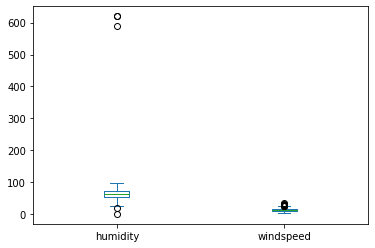

In [8]:
# Task 1.1: Type your code you used to find columns with Outliers. 
#  Hint 1:  use print() to display intermediate results
#  Hint 2 : use Box Plots as a visual tool
#############################################################
data[['humidity','windspeed']].plot.box()

#############################################################

In [9]:
data['humidity'].describe() 


count    731.000000
mean      65.041313
std       37.804388
min        0.000000
25%       52.000000
50%       63.100000
75%       73.250000
max      620.000000
Name: humidity, dtype: float64

In [10]:
data['windspeed'].describe()

count    731.000000
mean      12.763748
std        5.192322
min        1.500000
25%        9.000000
50%       12.100000
75%       15.600000
max       34.000000
Name: windspeed, dtype: float64

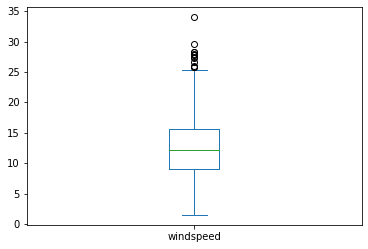

In [11]:
data[['windspeed']].plot.box()

     row_id  year  month  day weekday  is_holiday  is_workingday  \
49       49  2011      2   19     SAT           0            0.0   
68       68  2011      3   10     THU           0            1.0   
586     586  2012      8    9     THU           0            1.0   
592     592  2012      8   15     WED           0            1.0   
727     727  2012     12   28     FRI           0            1.0   

        weather_type  temperature  feel_temperature  humidity  windspeed  \
49             CLEAR         16.4              19.6      18.8       34.0   
68   LIGHT RAIN/SNOW         16.0              19.3       0.0       17.5   
586            CLEAR         31.0              35.0     620.0       10.5   
592            CLEAR         29.0              32.7     620.0       11.4   
727      CLOUDY/MIST         10.4              12.8     590.0       10.4   

     rental_count  
49           1635  
68            623  
586          7286  
592          7347  
727          3095  


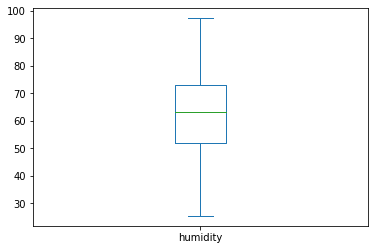

In [12]:
# Task 1.2: Remove rows containing outlier values
#############################################################
print(data.query(" humidity <20 or humidity > 100"))
#droping row by row 
data.drop(labels=49, axis=0, inplace=True)
data.drop(labels=68, axis=0, inplace=True)
data.drop(labels=586, axis=0, inplace=True)
data.drop(labels=592, axis=0, inplace=True)
data.drop(labels=727, axis=0, inplace=True)
data['humidity'].plot.box()


#############################################################

     row_id  year  month  day weekday  is_holiday  is_workingday weather_type  \
44       44  2011      2   14     MON           0            1.0        CLEAR   
93       93  2011      4    4     MON           0            1.0        CLEAR   
94       94  2011      4    5     TUE           0            1.0  CLOUDY/MIST   
238     238  2011      8   27     SAT           0            0.0  CLOUDY/MIST   
292     292  2011     10   20     THU           0            1.0        CLEAR   
377     377  2012      1   13     FRI           0            1.0        CLEAR   
382     382  2012      1   18     WED           0            1.0        CLEAR   
407     407  2012      2   12     SUN           0            0.0        CLEAR   
420     420  2012      2   25     SAT           0            0.0        CLEAR   
432     432  2012      3    8     THU           0            1.0        CLEAR   
433     433  2012      3    9     FRI           0            1.0  CLOUDY/MIST   
450     450  2012      3   2

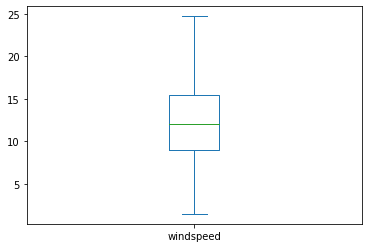

In [13]:
print(data.query(" windspeed>25"))
data.drop(labels=44, axis=0, inplace=True)
data.drop(labels=292, axis=0, inplace=True)
data.drop(labels=407, axis=0, inplace=True)
data.drop(labels=420, axis=0, inplace=True)
data.drop(labels=432, axis=0, inplace=True)
data.drop(labels=433, axis=0, inplace=True)
data.drop(labels=666, axis=0, inplace=True)
data.drop(labels=721, axis=0, inplace=True)
data.drop(labels=93, axis=0, inplace=True)
data.drop(labels=94, axis=0, inplace=True)
data.drop(labels=238, axis=0, inplace=True)
data.drop(labels=377, axis=0, inplace=True)
data.drop(labels=382, axis=0, inplace=True)
data.drop(labels=450, axis=0, inplace=True)
data.drop(labels=693, axis=0, inplace=True)
data.drop(labels=720, axis=0, inplace=True)

data['windspeed'].plot.box()


**Task 2 : Treating Missing Values**
 * 2.1 Identify and remove rows cotaining missing values

In [14]:
# Task 2.1:  Identify and remove rows cotaining missing values
#############################################################
data.dropna(how='any', axis=0, inplace=True)
data.shape

#############################################################

(699, 13)

**Task 3: Analyze `weather_type` and `weekday` columns**

 * 3.1 Get construct and display freqeuncy table for the column 'weather_type'
 * 3.2 Get a summary table of average `rental_count` by `weather_type'.
 * 3.3 Get a ummary table of average `rental_count` by `weekday`

In [15]:
#############################################################
# Task 3.1: Type your code to construct and display freqeuncy table for the column 'weather_type'.

data['weather_type'].value_counts()

#############################################################

CLEAR              443
CLOUDY/MIST        236
LIGHT RAIN/SNOW     20
Name: weather_type, dtype: int64

In [16]:
# Task 3.2: summary table of average `rental_count` by `weather_type`
# Hint: use group by
#############################################################
data.groupby(by='weather_type')['rental_count'].mean()

#############################################################

weather_type
CLEAR              4920.266366
CLOUDY/MIST        4057.686441
LIGHT RAIN/SNOW    1862.300000
Name: rental_count, dtype: float64

In [17]:
# Task 3.3: summary table of average `rental_count` by `weekday`
# Hint: use group by
#############################################################
data.groupby(by='weekday')['rental_count'].mean()

#############################################################

weekday
FRI    4710.134021
MON    4370.870000
SAT    4669.173469
SUN    4299.480000
THU    4679.090000
TUE    4537.029126
WED    4532.851485
Name: rental_count, dtype: float64

# 5. Encoding

**Task 4: Encode categorical columns `weather_type` and `weekday` to numeric values**

 * 4.1 Encode categorical columns `weather_type`
 * 4.2 Encode categorical columns `weekday`

**Encoding scheme**
**weather_type**
* CLEAR -> 1 
* CLOUDY/MIST -> 2
* LIGHT RAIN/SNOW -> 3

**weekday**
* SUN -> 1 
* MON -> 2 
* TUE -> 3 
* WED -> 4 
* THU -> 5 
* FRI -> 6 
* SAT -> 7 

In [18]:
# Task 4.1: Encode categorical columns weather_type
# Hint: use replace()
#############################################################

#converting weather into integer values
replace_dict = {
				  'CLEAR': 1, 
				  'CLOUDY/MIST': 2, 
				  'LIGHT RAIN/SNOW' :3, 
			}

data['weather_type'] = data['weather_type'].replace(replace_dict)

data['weather_type'] 

#############################################################

0      2
1      2
2      1
3      1
4      1
      ..
725    3
726    2
728    2
729    1
730    2
Name: weather_type, Length: 699, dtype: int64

In [19]:
# Task 4.2: Encode categorical columns weekday
# Hint: use replace()
#############################################################

replace_dict = {
				  'MON': 1, 
				  'TUE': 2, 
				  'WED' :3, 
          'THU' :4,
          'FRI':5, 
				  'SAT':6, 
				  'SUN' :7,
			}

data['weekday'] = data['weekday'].replace(replace_dict)

weekday = data['weekday']
data['weekday']

#############################################################

0      6
1      7
2      1
3      2
4      3
      ..
725    3
726    4
728    6
729    7
730    1
Name: weekday, Length: 699, dtype: int64

# 6. Building Machine Learning model

**Task 5: Get correlation_matrix for all numeric columns**

In [20]:
# Task 5: Complete the code below using correlation function Pandas.
#############################################################
correlation_matrix = data[['is_holiday', 'is_workingday', 'weather_type', 'temperature', 'feel_temperature', 'humidity','windspeed', 'rental_count']].corr()
#############################################################

correlation_matrix



,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
is_holiday,1.000000,-0.254932,-0.045680,-0.017949,-0.021627,-0.016207,0.018380,-0.059705
is_workingday,-0.254932,1.000000,0.068533,0.035545,0.033578,0.023363,-0.002625,0.040250
weather_type,-0.045680,0.068533,1.000000,-0.121739,-0.123526,0.636108,0.053672,-0.302232
temperature,-0.017949,0.035545,-0.121739,1.000000,0.991449,0.108586,-0.145424,0.624554
feel_temperature,-0.021627,0.033578,-0.123526,0.991449,1.000000,0.119633,-0.169326,0.627851
humidity,-0.016207,0.023363,0.636108,0.108586,0.119633,1.000000,-0.198589,-0.143357
windspeed,0.018380,-0.002625,0.053672,-0.145424,-0.169326,-0.198589,1.000000,-0.213742
rental_count,-0.059705,0.040250,-0.302232,0.624554,0.627851,-0.143357,-0.213742,1.000000


**Task 6: Create new variable `is_weekend`**

In [21]:
# Task 6: Type your code below to create a new variable `is_weekend` (1 if weekdaay is either 'SAT' or 'SUN')
# Hint: Replace "?" by the appropriate expression
#############################################################

# as to above >5 is saturday and sunday
data['is_weekend'] = np.where( data['weekday']>5, 1,0)

data
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count,is_weekend
0,0,2011,1,1,6,0,0.0,2,14.1,18.2,80.6,10.7,985,1
1,1,2011,1,2,7,0,0.0,2,14.9,17.7,69.6,16.7,801,1
2,2,2011,1,3,1,0,1.0,1,8.1,9.5,43.7,16.6,1349,0
3,3,2011,1,4,2,0,1.0,1,8.2,10.6,59.0,10.7,1562,0
4,4,2011,1,5,3,0,1.0,1,9.3,11.5,43.7,12.5,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2012,12,26,3,0,1.0,3,10.0,11.0,82.3,21.2,441,0
726,726,2012,12,27,4,0,1.0,2,10.4,11.3,65.3,23.5,2114,0
728,728,2012,12,29,6,0,0.0,2,10.4,12.1,75.3,8.3,1341,1
729,729,2012,12,30,7,0,0.0,1,10.5,11.6,48.3,23.5,1796,1


**Task 7:** 
 * 7.1 Identify indepenet (X) and dependent (y) variables your would use to build the model
 * 7.2 Split dataset into two datasets: tain and test
 * 7.3 Train Model
 * 7.4 Predict on Test Dataset and create a new DataFrame containing predict and actuals columns.
 * 7.5 Find Mean Squared Error

In [22]:
# Get liest of column names
data.columns

Index(['row_id', 'year', 'month', 'day', 'weekday', 'is_holiday',
       'is_workingday', 'weather_type', 'temperature', 'feel_temperature',
       'humidity', 'windspeed', 'rental_count', 'is_weekend'],
      dtype='object')

In [23]:
# Task 7.1: Identify indepenet (X) and dependent (y) variables and complete the code below. 
# You may need to type of copy column names from the dataframe. It is recomended to begin with minimum selected feature variables.
#############################################################
X_variables = ['weekday', 'weather_type', 'temperature', 'feel_temperature','humidity', 'windspeed']
y_variable = 'rental_count'
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['weekday', 'weather_type', 'temperature', 'feel_temperature', 'humidity', 'windspeed']
y_variable = rental_count


In [24]:
# Task 7.2 Type your code below to split the dataset into two datasets: train and test
# Hint1: use appropriate function from scikit-learn (replace "?"  by the correct expression to import the function)
# Hint 2: Use parameters test_size=0.3, random_state=0
#############################################################
from sklearn.model_selection import train_test_split

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#############################################################
print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 489
X_test size: 210


In [25]:
# Task 7.3 Train model
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
from sklearn.linear_model import LinearRegression
#############################################################
X = data[X_variables]
y = data[y_variable]
#############################################################
reg = LinearRegression().fit(X, y)

In [26]:
# Task 7.4 Predict on Test Dataset and create a new DataFrame (`results`) containing predict (`y_test_pred`) and actual (`y_test_actual`) columns.
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
#############################################################
X_test_features = X.values
y_test_actual = y.values

y_test_pred = reg.predict(X_test_features)

results = pd.DataFrame(data={'y_act':y_test_actual, 'y_pred':y_test_pred })

#############################################################
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,y_act,y_pred
0,985,3107.616655
1,801,3018.273202
2,1349,2869.293140
3,1562,2958.371788
4,1600,3366.916217


# 7. Model Evaluation

In [27]:
# Task 8.1: Find Mean Squared Error
# Hint1: use appropriate function from scikit-learn (replace "?"  by the correct expression to import the function)
#############################################################
from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test_actual, y_test_pred))
#############################################################

MSE: 1955603.0619769022


In [ ]:
# Bonus/Optional: plot `y_test_pred` vs `y_test_actual` 
#############################################################


#############################################################

# 8.1 Changing the problem to a Classification Problem
The business owner asked you to create secondery model to predict whether or not they make 5000 rentals in a given day. Your task now is to create a binary classifier model.

**Task 8:** 
 * 8.1 Create y variable (`is_rental_gt_5k`) for binary classifier

**Condition:**
if `rental_count>=5000` then `1` else `0`

In [28]:
#  8.1 Create y variable for binary classifier
#############################################################
data['is_rental_gt_5k'] = np.where(data['rental_count']>5000,1,0)
#############################################################
data['is_rental_gt_5k'].value_counts()

0    423
1    276
Name: is_rental_gt_5k, dtype: int64

**Task 9: Build Model**

In [37]:
# Task 9.1: Identify indepenet (X) and dependent (y) variables and complete the code below. 
# You may need to type of copy column names from the dataframe. It is recomended to begin with minimum selected feature variables.
#############################################################
X_variables = ['row_id', 'year', 'month', 'weather_type', 'temperature', 'feel_temperature','humidity', 'windspeed']
y_variable = 'is_rental_gt_5k'

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg = LinearRegression().fit(X, y)

y_test_pred = reg.predict(X_test)

#print('r2_score:', r2_score(y_test, y_test_pred))
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['row_id', 'year', 'month', 'weather_type', 'temperature', 'feel_temperature', 'humidity', 'windspeed']
y_variable = is_rental_gt_5k


In [47]:
# Task 9.2 Train model using Random Forest Classifier
# Hint 1: use same train and test datasets above
# Hint 2 : import scikit-learn Random Forest Classifier model class (replace "??"  by the correct expression to import the function)
# Hint 3 : use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
from sklearn.ensemble import RandomForestClassifier

#############################################################
X_variables = ['row_id', 'year', 'month', 'weather_type', 'temperature', 'feel_temperature','humidity', 'windspeed']
y_variable = 'is_rental_gt_5k'
#############################################################
reg = RandomForestClassifier(n_estimators=500)

In [58]:
# Task 9.3 Predict on Test Dataset and create a new DataFrame (`results`) containing predicted probability (`y_test_pred_prob`), predict (`y_test_pred`), and actual (`y_test_actual`) columns.
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
#############################################################
# Train Model
reg.fit(X_train, y_train)

X_test_features = X.values
y_test_actual = y.values

y_test_pred = reg.predict(X_test_features)
y_test_pred_prob = reg.predict_proba(X_test_features)[:, 1]

results = pd.DataFrame(data={'y_act':y_test_actual, 'y_pred':y_test_pred,'y_test_pred_prob': y_test_pred_prob})

#############################################################
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,y_act,y_pred,y_test_pred_prob
0,0,0,0.000
1,0,0,0.000
2,0,0,0.000
3,0,0,0.002
4,0,0,0.000


**Task 10: Evaluate Model**


In [59]:
# Task 10.1: Create Confusion Matrix
# complete the code below
#############################################################
cf_matrix = pd.crosstab(results['y_act'], results['y_pred'], margins=True)
#############################################################
print(cf_matrix)

y_pred    0    1  All
y_act                
0       413   10  423
1         6  270  276
All     419  280  699


y_pred    0    1  All
y_act                
0       413   10  423
1         6  270  276
All     419  280  699


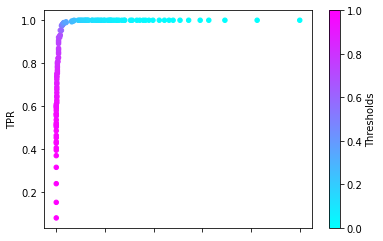

In [61]:
# Task 10.2: Compute Area Under ROC curve
# complete the code below
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct function or variable)
from sklearn import metrics
from matplotlib import cm
#############################################################
cmap = cm.get_cmap('cool') 
fpr, tpr, thresholds = metrics.roc_curve(results['y_act'], results['y_test_pred_prob'], pos_label=1)

roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(results['y_act'], results['y_test_pred_prob'])
#############################################################
print(cf_matrix)

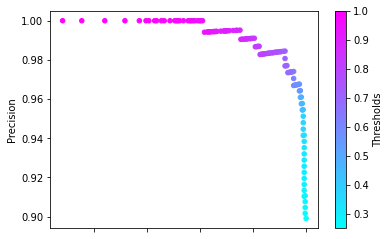

In [70]:
# Task 10.3: Get Precision ,recall and F1 score and display results
# Hint: use functions avaiable in `metrics`
#############################################################
precision, recall, thresholds = metrics.precision_recall_curve(results['y_act'], results['y_test_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

#############################################################



In [66]:
recall

array([1.        , 0.99637681, 0.99637681, 0.99637681, 0.99637681,
       0.99275362, 0.99275362, 0.99275362, 0.99275362, 0.99275362,
       0.99275362, 0.99275362, 0.99275362, 0.99275362, 0.99275362,
       0.99275362, 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98550725, 0.98550725, 0.98188406, 0.98188406,
       0.97826087, 0.97826087, 0.97463768, 0.97463768, 0.97101449,
       0.9673913 , 0.96376812, 0.96014493, 0.95652174, 0.95289855,
       0.95289855, 0.95289855, 0.94927536, 0.94565217, 0.94202899,
       0.9384058 , 0.93478261, 0.93115942, 0.92753623, 0.92391304,
       0.92028986, 0.92028986, 0.92028986, 0.91304348, 0.9057971 ,
       0.90217391, 0.89855072, 0.89130435, 0.88768116, 0.88405797,
       0.88043478, 0.87681159, 0.87318841, 0.86956522, 0.86231884,
       0.85869565, 0.85507246, 0.85144928, 0.8442029 , 0.84057971,
       0.83695652, 0.83333333, 0.82971014, 0.82608696, 0.82246377,
       0.81884058, 0.81521739, 0.8115942 , 0.80797101, 0.80434

<hr>
Last update 2022-04-09 by Sumudu Tennakoon